# Exploratory Data Analysis
This is a file used for EDA during the TDT17 mini project.

In [1]:
# install relevant packages
import numpy as np
import matplotlib.pyplot as plt
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, Spacingd, ScaleIntensityRanged, LoadImage
from monai.data import Dataset, DataLoader

In [4]:
datapath = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/2/preRT/2_preRT_T2.nii.gz"

torch.Size([512, 512, 83])


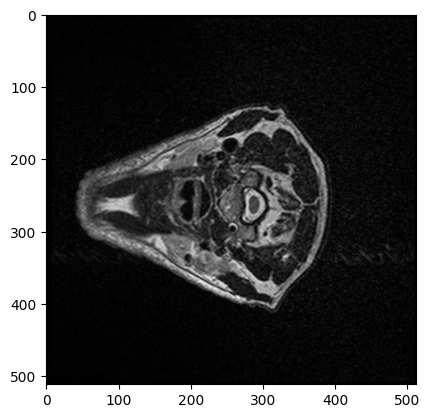

In [19]:
img_loader = LoadImage(image_only=True)
img_data = img_loader(datapath)
print(img_data.shape)
plt.imshow(img_data[:, :, 43], cmap='gray')